In [1]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [4]:
df = pd.read_csv('train.csv')
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
categ = [
    'country', # country in which person lives
    'year', # year the survey was done
    'location_type',
    'cellphone_access',
    'gender_of_respondent',
    'relationship_with_head',
    'marital_status',
    'education_level',
    'job_type'
]

quant = [
    'household_size',
    'age_of_respondent'
]

target = 'bank_account'

#### EDA

In [6]:
#help(sns.boxplot)

23524


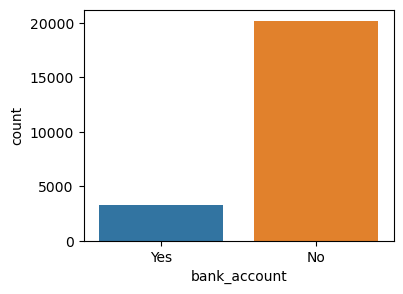

In [7]:
# univar
plt.figure(figsize=(4,3))
ax = sns.countplot(x=target, data=df)
total = len(df[target])
print(total)

In [9]:
lignes = [0,1,2]
x = enumerate(itertools.product(lignes, lignes))
for e in x:
    print(e)

(0, (0, 0))
(1, (0, 1))
(2, (0, 2))
(3, (1, 0))
(4, (1, 1))
(5, (1, 2))
(6, (2, 0))
(7, (2, 1))
(8, (2, 2))


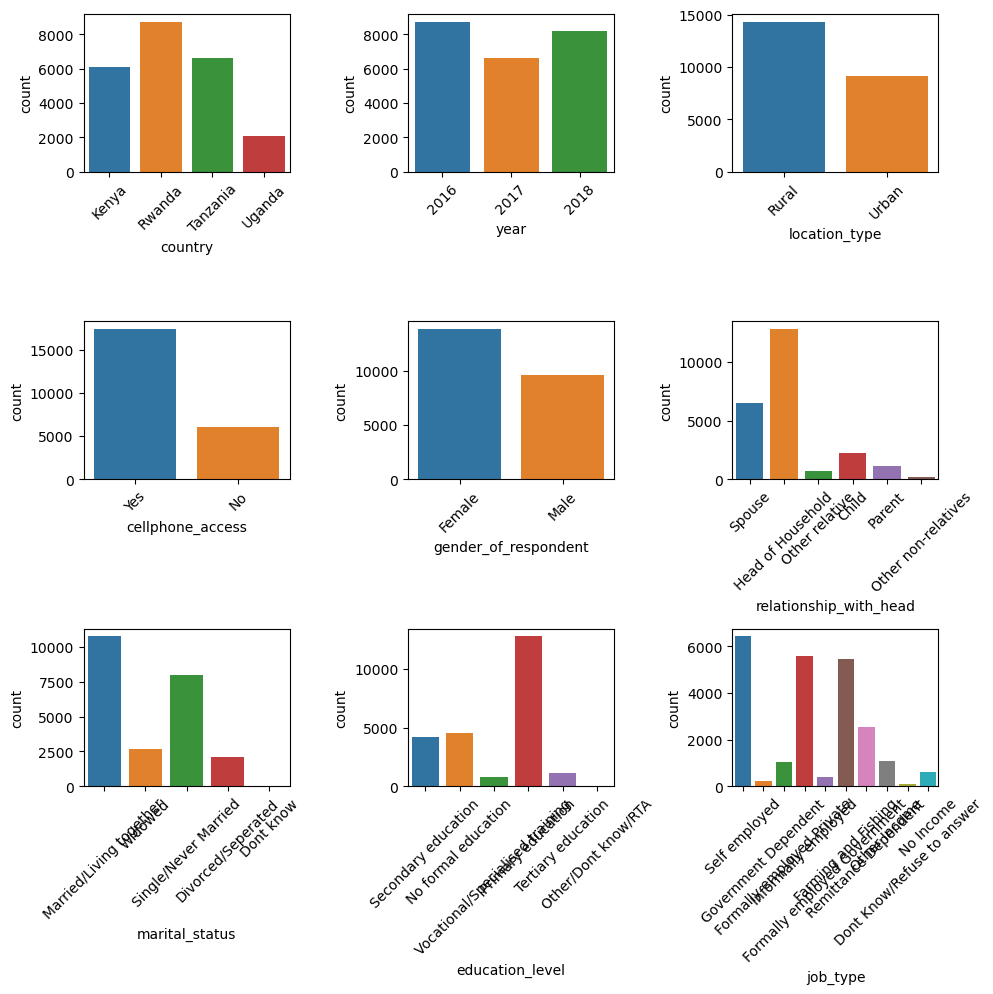

In [10]:
f, axs = plt.subplots(3, 3, figsize=(10,10))
lignes = [0,1,2]

for i,j in enumerate(itertools.product(lignes, lignes)):
    fig = sns.countplot(data = df, x = categ[i], ax = axs[j[0], j[1]])
    fig.tick_params(axis='x', labelrotation=45)

f.tight_layout()

In [11]:
#help(pd.DataFrame.count)

In [12]:
# more of univariate
for c in ['job_type', 'education_level', 'marital_status', 'relationship_with_head']:
    print(c.upper() + ' (in %)', end='\n\n')
    print(round(100*df[c].value_counts()/total, 2), end='\n'+'='*50+'\n')

JOB_TYPE (in %)

Self employed                   27.36
Informally employed             23.79
Farming and Fishing             23.13
Remittance Dependent            10.74
Other Income                     4.59
Formally employed Private        4.48
No Income                        2.67
Formally employed Government     1.65
Government Dependent             1.05
Dont Know/Refuse to answer       0.54
Name: job_type, dtype: float64
EDUCATION_LEVEL (in %)

Primary education                  54.37
No formal education                19.19
Secondary education                17.95
Tertiary education                  4.92
Vocational/Specialised training     3.41
Other/Dont know/RTA                 0.15
Name: education_level, dtype: float64
MARITAL_STATUS (in %)

Married/Living together    45.69
Single/Never Married       33.94
Widowed                    11.51
Divorced/Seperated          8.83
Dont know                   0.03
Name: marital_status, dtype: float64
RELATIONSHIP_WITH_HEAD (in %)

Head of 

<Figure size 700x500 with 0 Axes>

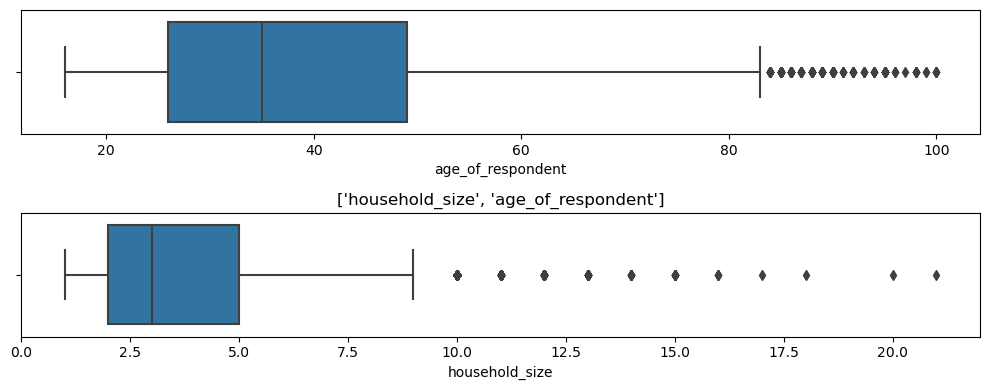

In [14]:
# univar quant 
plt.figure(figsize=(7,5))
f, axs = plt.subplots(2, 1, figsize=(10,4))
sns.boxplot(x=quant[0], data=df, ax=axs[1])
sns.boxplot(x=quant[1], data=df, ax=axs[0])
plt.title(quant)
f.tight_layout()

<AxesSubplot:xlabel='household_size', ylabel='Count'>

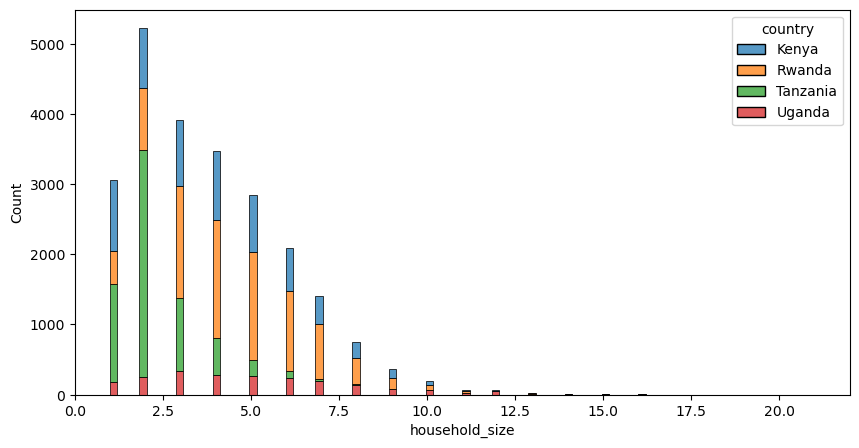

In [15]:
# bivariate col x target
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='household_size', hue='country', multiple='stack')
# sns.histplot(data=df_train, x='household_size', hue='country', multiple='stack')
# distplot par defaut pareil que histplot avec meme code
# distplots : histplot kdeplot, ecdfplot, ruglot

<AxesSubplot:xlabel='age_of_respondent', ylabel='Density'>

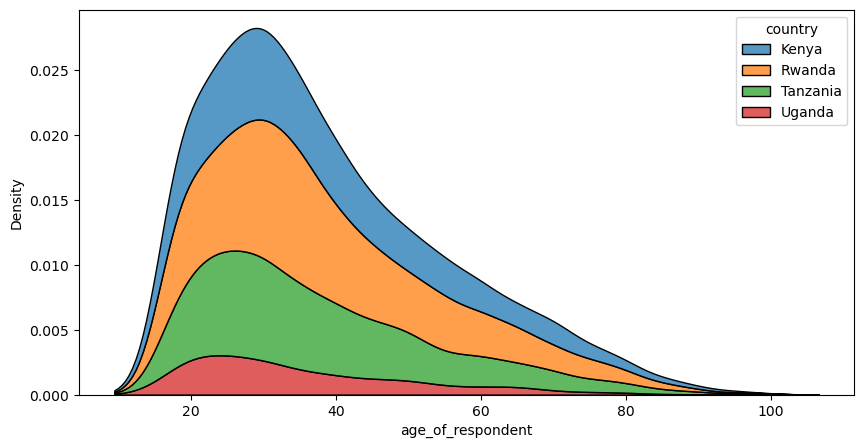

In [16]:
plt.figure(figsize=(10,5))
# kernel density 
sns.kdeplot(data=df, x='age_of_respondent', hue='country', multiple='stack')

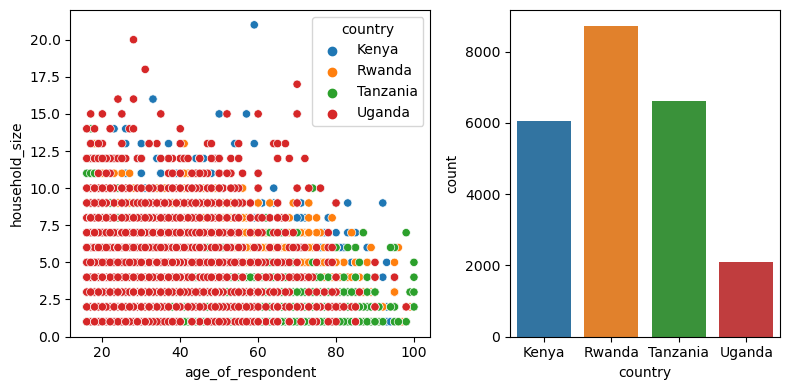

In [83]:
# relplot : scatterplot lineplot
# catplot : stripplot swarmplot boxplot violinplot pointplot barplot

f, axs = plt.subplots(1, 2, figsize=(8,4), gridspec_kw={'width_ratios':[4,3]})
sns.scatterplot(data=df_train, y='household_size', x='age_of_respondent', hue='country', ax=axs[0])
sns.countplot(data=df_train, x='country')
f.tight_layout()

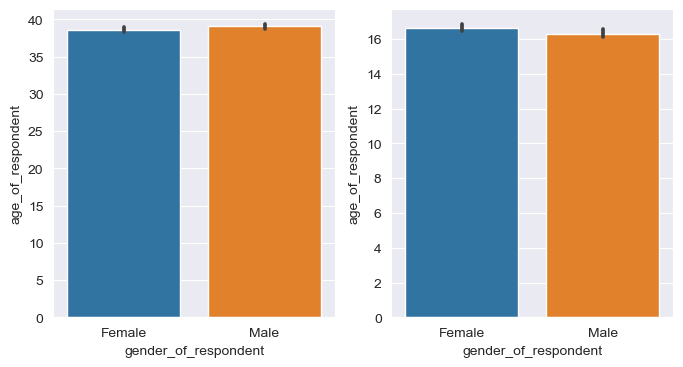

In [88]:
# set the background style of the plot
f, axs = plt.subplots(1, 2, figsize=(8,4))

# plot the graph using the default estimator mean
sns.barplot(x ='gender_of_respondent', y ='age_of_respondent', data = df_train, ax=axs[0])
# or
import numpy as np
 
# change the estimator from mean to standard deviation
sns.barplot(x ='gender_of_respondent', y ='age_of_respondent', data = df_train, estimator = np.std, ax=axs[1])
plt.show()
f.tight_layout()

<AxesSubplot:xlabel='country', ylabel='age_of_respondent'>

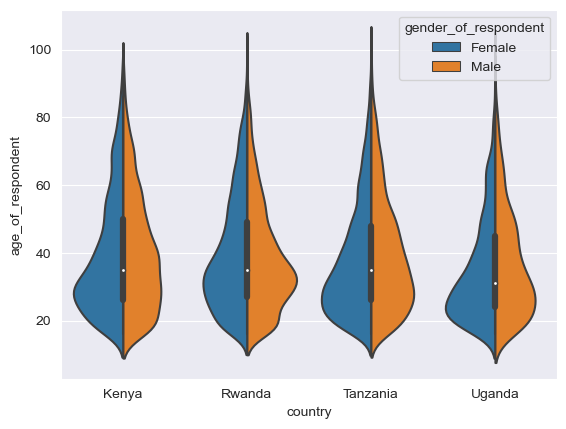

In [89]:
sns.violinplot(x ='country', y ='age_of_respondent', data = df_train, hue ='gender_of_respondent', split = True)

C:\Users\gbeno\anaconda3\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='country', ylabel='age_of_respondent'>

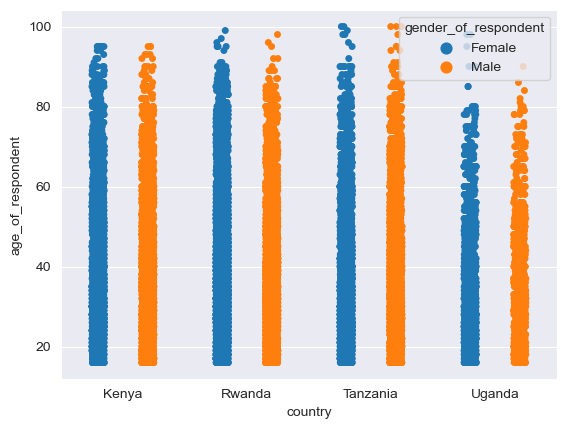

In [90]:
sns.stripplot(x ='country', y ='age_of_respondent', data = df_train, hue ='gender_of_respondent', split = True)

C:\Users\gbeno\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


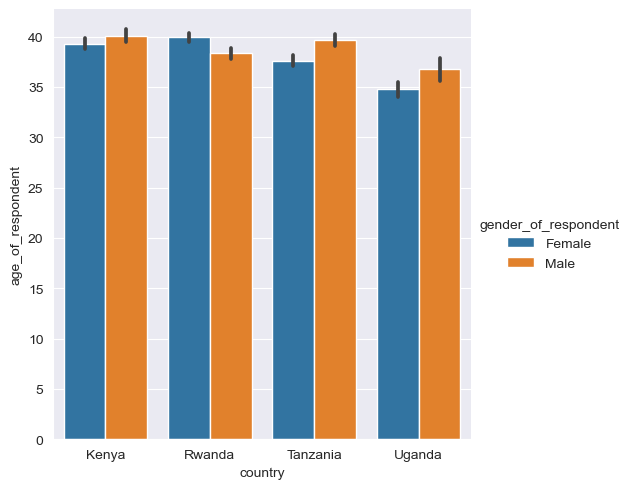

In [93]:
sns.factorplot(x ='country', y ='age_of_respondent', hue='gender_of_respondent', data = df_train, kind ='bar')

In [17]:
# prep analyse factorielle
df_prep = df.copy()
df_prep[categ]
df_prep = df_prep.drop(columns=['uniqueid'])

to_label = [
    'country',
    'location_type',
    'cellphone_access',
    'gender_of_respondent',
    'relationship_with_head',
    'marital_status',
    'job_type'
]

to_orde = ['education_level']

LE, OE = LabelEncoder(), OrdinalEncoder()
for c in to_label + [target] + to_orde:
    df_prep[c] = LE.fit_transform(df_prep[c])


df_prep

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,0,1,3,24,0,5,2,3,9
1,0,2018,0,0,0,5,70,0,1,4,0,4
2,0,2018,1,1,1,5,26,1,3,3,5,9
3,0,2018,0,0,1,5,34,0,1,2,2,3
4,0,2018,0,1,0,8,26,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2018,0,0,1,4,48,0,1,0,0,7
23520,3,2018,0,0,1,2,27,0,1,3,3,7
23521,3,2018,0,0,1,5,27,0,4,4,2,7
23522,3,2018,0,1,1,7,30,0,4,0,3,9


In [39]:
# analyse factorielle
transformer = FactorAnalysis(n_components=5, random_state=0)
X_transformed = transformer.fit_transform(df_prep[categ])

#X_transformed
transformer.get_feature_names_out()
#help(transformer)

array(['factoranalysis0', 'factoranalysis1', 'factoranalysis2',
       'factoranalysis3', 'factoranalysis4'], dtype=object)

#### model

In [156]:
#!pip install catboost

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from catboost import CatBoostClassifier
#help(catboost)

In [157]:
vars_ = ['country', 'year', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']
target = 'bank_account'

In [159]:
x = df_train[vars_]
y = df_train[target]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2)

categorical_feat = vars_
model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.2, cat_features=categorical_feat,
                           loss_function='Logloss', custom_metric=['AUC'], random_seed=42)
model.fit(X_train, y_train)

0:	learn: 0.5883819	total: 35.3ms	remaining: 3.49s
1:	learn: 0.5161854	total: 79.9ms	remaining: 3.92s
2:	learn: 0.4606570	total: 130ms	remaining: 4.21s
3:	learn: 0.4222477	total: 181ms	remaining: 4.34s
4:	learn: 0.3944135	total: 235ms	remaining: 4.47s
5:	learn: 0.3740081	total: 299ms	remaining: 4.68s
6:	learn: 0.3582688	total: 364ms	remaining: 4.83s
7:	learn: 0.3455909	total: 418ms	remaining: 4.8s
8:	learn: 0.3345598	total: 467ms	remaining: 4.72s
9:	learn: 0.3263778	total: 528ms	remaining: 4.76s
10:	learn: 0.3199774	total: 574ms	remaining: 4.65s
11:	learn: 0.3136478	total: 618ms	remaining: 4.53s
12:	learn: 0.3102604	total: 665ms	remaining: 4.45s
13:	learn: 0.3067804	total: 713ms	remaining: 4.38s
14:	learn: 0.3041119	total: 764ms	remaining: 4.33s
15:	learn: 0.3002582	total: 813ms	remaining: 4.27s
16:	learn: 0.2986045	total: 871ms	remaining: 4.25s
17:	learn: 0.2960310	total: 927ms	remaining: 4.22s
18:	learn: 0.2946626	total: 987ms	remaining: 4.21s
19:	learn: 0.2932034	total: 1.04s	remain

In [160]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
 
# print accuracy
print(f"Error : {1-accuracy:.3f}")

Error : 0.114


In [108]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=[
            'Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'confusion' is not defined

<Figure size 800x600 with 0 Axes>

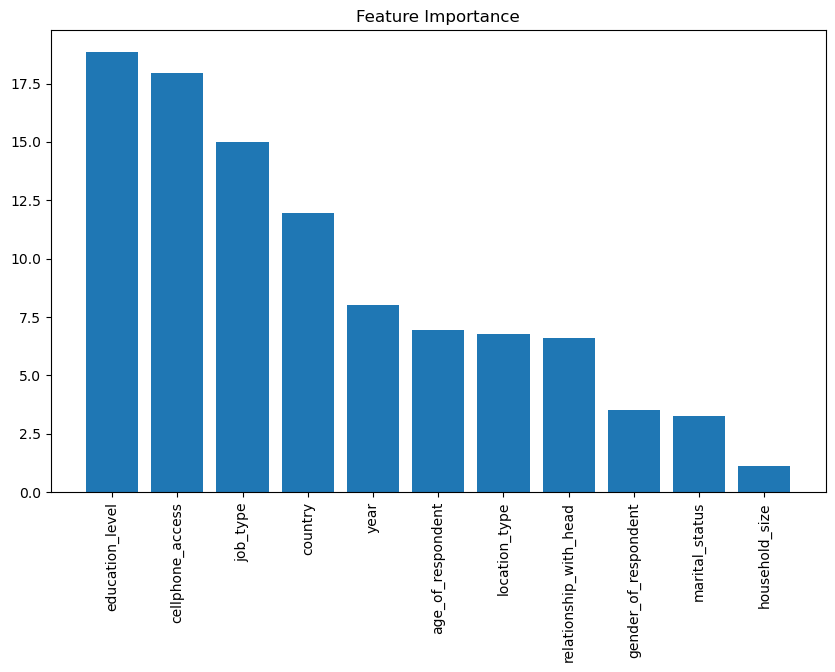

In [161]:
importances = model.get_feature_importance()
feature_names = x.columns
sorted_indices = np.argsort(importances)[::-1]
 
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices])
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.title("Feature Importance")
plt.show()

In [110]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.98      0.94      4028
         Yes       0.72      0.36      0.48       677

    accuracy                           0.89      4705
   macro avg       0.81      0.67      0.71      4705
weighted avg       0.88      0.89      0.87      4705



0:	learn: 0.5865790	total: 39.1ms	remaining: 3.87s
1:	learn: 0.5175042	total: 67ms	remaining: 3.28s
2:	learn: 0.4672159	total: 112ms	remaining: 3.61s
3:	learn: 0.4273826	total: 162ms	remaining: 3.88s
4:	learn: 0.3967637	total: 237ms	remaining: 4.5s
5:	learn: 0.3750099	total: 314ms	remaining: 4.92s
6:	learn: 0.3585683	total: 361ms	remaining: 4.8s
7:	learn: 0.3449326	total: 404ms	remaining: 4.65s
8:	learn: 0.3350633	total: 445ms	remaining: 4.5s
9:	learn: 0.3286919	total: 486ms	remaining: 4.38s
10:	learn: 0.3231874	total: 530ms	remaining: 4.29s
11:	learn: 0.3179379	total: 577ms	remaining: 4.23s
12:	learn: 0.3143045	total: 618ms	remaining: 4.13s
13:	learn: 0.3108783	total: 662ms	remaining: 4.07s
14:	learn: 0.3070620	total: 705ms	remaining: 3.99s
15:	learn: 0.3053651	total: 746ms	remaining: 3.92s
16:	learn: 0.3020501	total: 800ms	remaining: 3.9s
17:	learn: 0.3002137	total: 843ms	remaining: 3.84s
18:	learn: 0.2988179	total: 891ms	remaining: 3.8s
19:	learn: 0.2977736	total: 932ms	remaining: 3

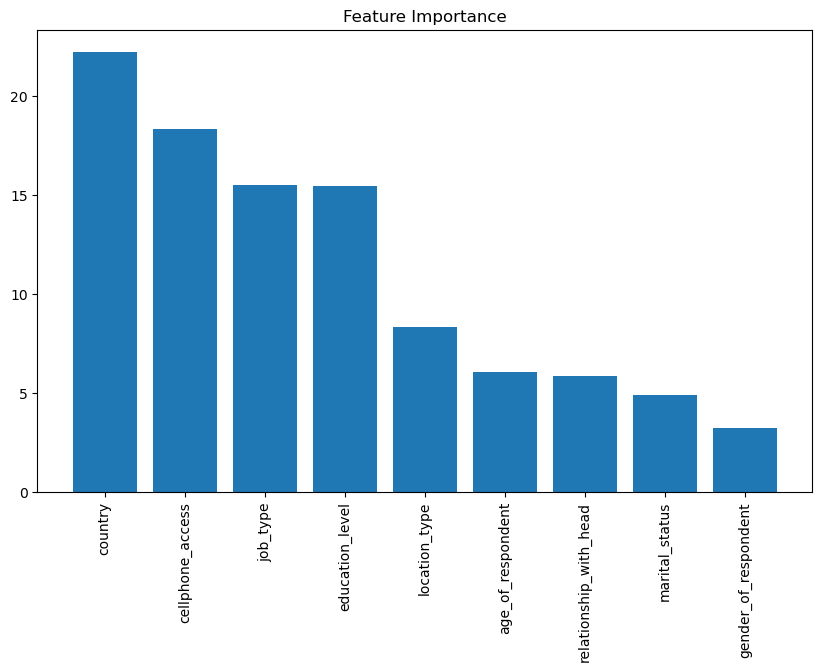

In [195]:
# selection de variables inclure une variable random décorelée de la target e tdes autres
vars_ = ['country', 'location_type',
       'cellphone_access', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'] #, 'household_size']
target = 'bank_account'

df2 = df_train.copy()
df2['alea'] = np.random.randn(len(df2))

x = df2[vars_]# + ['alea']]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2)

categorical_feat = vars_
model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.2, cat_features=categorical_feat,
                           loss_function='Logloss', custom_metric=['AUC'], random_seed=42)
model.fit(X_train, y_train)

importances = model.get_feature_importance()
feature_names = x.columns
sorted_indices = np.argsort(importances)[::-1]
 
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices])
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.title("Feature Importance")
plt.show()

In [196]:
print("Classification Report:")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.98      0.94      4078
         Yes       0.70      0.35      0.46       627

    accuracy                           0.89      4705
   macro avg       0.80      0.66      0.70      4705
weighted avg       0.88      0.89      0.88      4705



In [178]:
#!pip install imblearn

C:\Users\gbeno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bank_account', ylabel='count'>

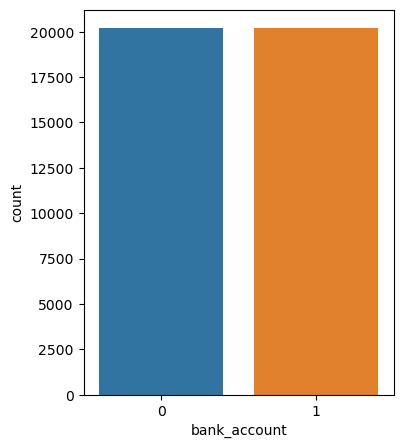

In [187]:
# re sampling
from imblearn.over_sampling import SMOTE, ADASYN

X = df_prep[vars_]
y = df_prep[target]

X_resampled, y_resampled = SMOTE().fit_resample(X, y)
plt.figure(figsize=(4,5))
sns.countplot(y_resampled)

0:	learn: 0.6393474	total: 43.9ms	remaining: 4.34s
1:	learn: 0.6016105	total: 92ms	remaining: 4.51s
2:	learn: 0.5745365	total: 141ms	remaining: 4.57s
3:	learn: 0.5525838	total: 192ms	remaining: 4.6s
4:	learn: 0.5350806	total: 241ms	remaining: 4.58s
5:	learn: 0.5201811	total: 294ms	remaining: 4.6s
6:	learn: 0.5091296	total: 347ms	remaining: 4.61s
7:	learn: 0.5002767	total: 395ms	remaining: 4.54s
8:	learn: 0.4931847	total: 442ms	remaining: 4.47s
9:	learn: 0.4881044	total: 485ms	remaining: 4.37s
10:	learn: 0.4835836	total: 536ms	remaining: 4.34s
11:	learn: 0.4776719	total: 587ms	remaining: 4.3s
12:	learn: 0.4741326	total: 633ms	remaining: 4.24s
13:	learn: 0.4710608	total: 684ms	remaining: 4.2s
14:	learn: 0.4689737	total: 735ms	remaining: 4.16s
15:	learn: 0.4655402	total: 795ms	remaining: 4.17s
16:	learn: 0.4631828	total: 847ms	remaining: 4.13s
17:	learn: 0.4604346	total: 900ms	remaining: 4.1s
18:	learn: 0.4589837	total: 948ms	remaining: 4.04s
19:	learn: 0.4554007	total: 1s	remaining: 4s
2

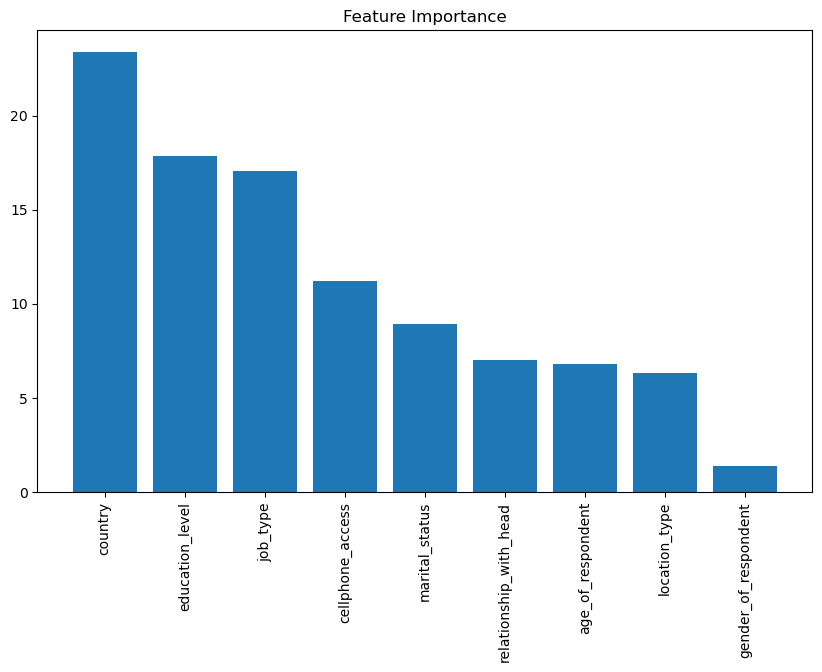

In [192]:
# selection de variables inclure une variable random décorelée de la target e tdes autres
vars_ = ['country', 'location_type',
       'cellphone_access', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'] #, 'household_size']
target = 'bank_account'

df3 = X_resampled.copy()
df3['alea'] = np.random.randn(len(df3))

x = df3[vars_]# + ['alea']]
y = y_resampled
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2)

categorical_feat = vars_
model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.2, cat_features=categorical_feat,
                           loss_function='Logloss', custom_metric=['AUC'], random_seed=42)
model.fit(X_train, y_train)

importances = model.get_feature_importance()
feature_names = x.columns
sorted_indices = np.argsort(importances)[::-1]
 
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices])
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.title("Feature Importance")
plt.show()

In [194]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      4087
           1       0.79      0.82      0.80      3998

    accuracy                           0.80      8085
   macro avg       0.80      0.80      0.80      8085
weighted avg       0.80      0.80      0.80      8085



Tx bien prédits : accuracy
``
80% _> exhantillon équilibré avec la meth SMOTE (creer des obs proches de celles qui existent dans la classe en déficit 'yes').
``
Tx de bien prédit parmis les 'yes' prédits : précision 1
``
79% _>.
``
Tx de bien prédit parmi les 'yes' réels : recall 1
``
82%
``<br><br>
Les scores recall et f1 sont globalement meilleurs pour le modèle lorsque l'echantillon est équilibré. 
En effet, ``avant, on avait des recall ~50% (1/2 qui a un compte était prédit comme n'ayant pas de compte) `` => aléatoire.  

In [55]:
# analyse de la variance par pays x taille_menage # selection de variables pre
rwanda = df['household_size'].where(df['country']=='Rwanda')
tanzania = df['household_size'].where(df['country']=='Tanzania')
kenya = df['household_size'].where(df['country']=='Kenya')
uganda = df['household_size'].where(df['country']=='Uganda')

In [44]:
df['country'].value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [59]:
from scipy import stats

stats.f_oneway(rwanda, tanzania, kenya, uganda)

#p-value

F_onewayResult(statistic=nan, pvalue=nan)